# Understanding the data

## The data directory

In donkeycar, the data you collected are stored in a folder called `data` under `mycar`

Use the file explorer on the left, open `mycar` and execute the following cell

In [4]:
%cd ~/mycar
!ls

/home/pi/mycar
calibrate.py  data	 logs	    models  myconfig.py  Untitled1.ipynb
config.py     drive.log  manage.py  movies  train.py


Use the following command to change directory to data and list all files and directory under `data`

In [5]:
%cd ~/mycar/data
!ls

/home/pi/mycar/data
tub_1_23-11-24	 tub_2_23-11-24   tub_45_24-01-13  tub_59_24-02-01
tub_15_23-11-30  tub_25_23-12-02  tub_47_24-01-13  tub_60_24-02-20
tub_16_23-11-30  tub_30_23-12-22  tub_48_24-01-13  tub_61_24-02-20
tub_18_23-12-02  tub_35_24-01-13  tub_49_24-01-13  tub_8_23-11-29
tub_20_23-12-02  tub_40_23-12-28  tub_51_24-01-13
tub_21_23-12-02  tub_44_24-01-13  tub_55_24-02-01


Each time you collect data, they are stored in a directory called `Tub`. The directory name start with `tub` and then has a sequential number followed by the date it was collected (in YY-MM-DD format)

## Inside a Tub

Let's count how many tubs we have. We will use a library called `os` and import a function called `listdir` to list all the directories

In [3]:
from os import listdir

data_path = "/home/pi/mycar/data"

tubs = [d for d in listdir(data_path)]

len(tubs)

22

Let's use the first tub we find in the previous program

In [4]:
tub = tubs[0]
print(f"Tub name = {tub}")

Tub name = tub_2_23-11-24


Let's check what's in this tub. Note that we use `$tub` below, it is because we use the symbol `$` to refer a python variable

In [5]:
tub_path = f"{data_path}/{tub}"

%cd $tub_path
!ls

/home/pi/mycar/data/tub_2_23-11-24
catalog_0.catalog	    catalog_2.catalog		images
catalog_0.catalog_manifest  catalog_2.catalog_manifest	manifest.json
catalog_1.catalog	    catalog_3.catalog		meta.json
catalog_1.catalog_manifest  catalog_3.catalog_manifest	tub_2_23-11-24_hist.png


Inside a tub, there are a number of files.

1. A folder called `images`
2. Catalog files
3. `manifest.json`
4. `meta.json`
5. A histogram file end with _hist.png

### The `images` folder



Let's ls the images folder and see the first 3 files in this folder (sorted by filename). 

The linux command `head` can be used to display the first 3 lines in this file. You can change the number to display more lines.

In [9]:
%%bash 
ls images | head -100

0_cam_image_array_.jpg
1000_cam_image_array_.jpg
1001_cam_image_array_.jpg
1002_cam_image_array_.jpg
1003_cam_image_array_.jpg
1004_cam_image_array_.jpg
1005_cam_image_array_.jpg
1006_cam_image_array_.jpg
1007_cam_image_array_.jpg
1008_cam_image_array_.jpg
1009_cam_image_array_.jpg
100_cam_image_array_.jpg
1010_cam_image_array_.jpg
1011_cam_image_array_.jpg
1012_cam_image_array_.jpg
1013_cam_image_array_.jpg
1014_cam_image_array_.jpg
1015_cam_image_array_.jpg
1016_cam_image_array_.jpg
1017_cam_image_array_.jpg
1018_cam_image_array_.jpg
1019_cam_image_array_.jpg
101_cam_image_array_.jpg
1020_cam_image_array_.jpg
1021_cam_image_array_.jpg
1022_cam_image_array_.jpg
1023_cam_image_array_.jpg
1024_cam_image_array_.jpg
1025_cam_image_array_.jpg
1026_cam_image_array_.jpg
1027_cam_image_array_.jpg
1028_cam_image_array_.jpg
1029_cam_image_array_.jpg
102_cam_image_array_.jpg
1030_cam_image_array_.jpg
1031_cam_image_array_.jpg
1032_cam_image_array_.jpg
1033_cam_image_array_.jpg
1034_cam_image_arr

We can use a library called `PIL` and its function `Image` to open one image file we have. 

Feel free to change the filename to see different images inside the tub.

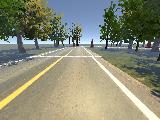

In [6]:
from PIL import Image
from IPython.display import display

tub_path
img = Image.open(f"{tub_path}/images/0_cam_image_array_.jpg")
display(img)

We can use the `size` function to check the dimension of the image. It should be 160 x 120 pixels.

In [7]:
# check the size of the image
img.size

(160, 120)

Write a for loop to display multiple images

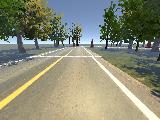

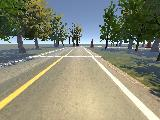

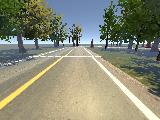

In [8]:
for i in range(0,3):
    img = Image.open(f"{tub_path}/images/{i}_cam_image_array_.jpg")
    display(img)

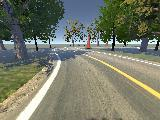

In [11]:

# Display function
# ================
def play_tub(tub_name):
    import cv2
    from IPython.display import display

    display_handle=display(None, display_id=True)
    for i in range(0,300):
        image_path = f"{tub_path}/images/{i}_cam_image_array_.jpg"
        
        img =  cv2.imread(image_path)

        image_bgr = cv2.imread(image_path)
        
        # Convert the image from BGR to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
        image_pil = Image.fromarray(image_rgb)
        display_handle.update(image_pil)

play_tub(tub)

### Catalog

The catalog file contains a list of lines. Each line store the filename of each picture you have taken during recording, together with the time, angle and throttle at that particular moment. By default, each catalog contains at most 1000 lines. When one catalog file reach 1000 lines, another catalog file is automatically created. 

In [67]:
!head -3 catalog_0.catalog

{"_index": 0, "_session_id": "23-11-24_0", "_timestamp_ms": 1700810003883, "cam/image_array": "0_cam_image_array_.jpg", "user/angle": -0.010000000000000009, "user/mode": "user", "user/throttle": 0.24}
{"_index": 1, "_session_id": "23-11-24_0", "_timestamp_ms": 1700810003930, "cam/image_array": "1_cam_image_array_.jpg", "user/angle": 0.0, "user/mode": "user", "user/throttle": 0.3620000000000001}
{"_index": 2, "_session_id": "23-11-24_0", "_timestamp_ms": 1700810003980, "cam/image_array": "2_cam_image_array_.jpg", "user/angle": -0.010000000000000009, "user/mode": "user", "user/throttle": 0.51}


What is the format of the catalog file used to store data?

It is called JSON Lines. JSON Lines format is similar to the CSV format where each line in the file represents a separate JSON object. 

For more details, check https://jsonlines.org/

### Manifest.json

The `manifest.json` stores how many catalog are presented in this tub. In addition, it keeps track of the current index and the system will resume from this index if it continues recording. 

Note that there is a field called `deleted_indexes`, it is used for storing which images are deleted in this tub. We call this soft delete because the images are marked as deleled only but not physically deleted.

In [130]:
!head -10 manifest.json

["cam/image_array", "user/angle", "user/throttle", "user/mode"]
["image_array", "float", "float", "str"]
{}
{"created_at": 1700809996.4304266, "sessions": {"all_full_ids": ["23-11-24_0"], "last_id": 0, "last_full_id": "23-11-24_0"}}
{"paths": ["catalog_0.catalog", "catalog_1.catalog", "catalog_2.catalog", "catalog_3.catalog"], "current_index": 3220, "max_len": 1000, "deleted_indexes": []}


### Meta.json

In [131]:
!head -10 meta.json

{"last_update": "11/24/2023, 15:16:05", "size": 19.52, "uuid": "6ee2c59a-b8f4-4cb5-b06a-9691229919ae"}

This file contains the following information:

- Size: Total size of this tub calculated in MB
- uuid : The uuid of this tub. Tub does not have an uuid until it is uploaded for remote training. If you delete this field, the tub will be uploaded again to our server when you use this tub for training. This is sometimes useful if you believe that the tub on our server is corrupted.